# PRISM products in VirES - visualization of subauroral boundaries

This notebook demonstrates of the subaroral boundaries from the `MITx_LP_2F`, `MITxTEC_2F` and `PPIxFAC_2F` Swarm products retrieved by means of the vires client.


In [1]:
from viresclient import SwarmRequest

SERVER_URL = "https://vires.services/ows"


In [2]:
SPACECRAFT = 'A'
START_TIME = "2015-12-30T00:00:00Z"
END_TIME = "2016-01-02T00:00:00Z"
MIT_LP_TE_PEAK = 0x6

def _insert(list_, value):
    if value not in list_:
        list_.apped(value)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MOD{SPACECRAFT}_SC_1B")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'MLT', 'Kp'],
    sampling_step="PT1S"
)
data_track = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
).as_xarray()

print(data_track)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}_LP_2F")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'MLT'],
)
data_ne_min = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_ne_min)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}_LP_2F:ID")
request.set_products(
    measurements=['PointType'],
    auxiliaries=['QDLat', 'MLT'],
)
request.set_range_filter('PointType', MIT_LP_TE_PEAK, MIT_LP_TE_PEAK)
data_te_peak = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_te_peak)
assert (data_te_peak['PointType'].values == MIT_LP_TE_PEAK).all()

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}TEC_2F")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'MLT'],
)
data_tec_min = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_tec_min)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_PPI{SPACECRAFT}FAC_2F:ID")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'MLT'],
)
data_ssfac = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_ssfac)


Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (14.78MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 259200)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30 ... 2016-01-01T23:59:59
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 -25.88 -25.81 -25.75 ... 31.55 31.61 31.67
    MLT         (Timestamp) float64 17.57 17.57 17.57 ... 17.16 17.16 17.16
    Kp          (Timestamp) float64 2.3 0.0 0.0 0.0 0.0 ... 1.7 1.7 1.7 1.7 1.7
    Radius      (Timestamp) float64 6.832e+06 6.832e+06 ... 6.823e+06 6.823e+06
    Longitude   (Timestamp) float64 -94.26 -94.26 -94.26 ... -95.37 -95.37
    QDLat       (Timestamp) float64 -15.46 -15.4 -15.34 ... 41.25 41.31 41.38
Attributes:
    Sources:         ['SW_OPER_AUX_KP__2__19980101T013000_20220408T103000_000...
    MagneticModels:  []
    RangeFilters:    []


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.063MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 68)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30T00:37:35.196999936 ... ...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 61.01 61.7 64.41 63.0 ... 63.66 55.69 57.22
    MLT         (Timestamp) float64 5.29 5.412 16.82 5.692 ... 18.67 5.005 5.026
    Radius      (Timestamp) float64 6.818e+06 6.818e+06 ... 6.818e+06 6.818e+06
    Longitude   (Timestamp) float64 72.8 49.22 -140.3 ... -23.28 143.5 96.42
    QDLat       (Timestamp) float64 57.14 58.0 66.07 59.68 ... 64.2 49.69 53.02
Attributes:
    Sources:         ['SW_OPER_MITA_LP_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    []


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.072MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 46)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30T00:37:41.196999936 ... ...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 60.63 61.26 61.94 62.09 ... 60.06 61.7 55.63
    MLT         (Timestamp) float64 5.292 5.41 5.677 6.063 ... 4.45 4.645 5.006
    Radius      (Timestamp) float64 6.818e+06 6.818e+06 ... 6.818e+06 6.818e+06
    Longitude   (Timestamp) float64 72.85 49.28 25.7 2.2 ... -169.9 166.4 143.5
    QDLat       (Timestamp) float64 56.76 57.55 58.57 ... 56.88 56.46 49.63
    PointType   (Timestamp) uint8 6 6 6 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6 6 6
Attributes:
    Sources:         ['SW_OPER_MITA_LP_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    ['PointType:6,6']


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.063MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 39)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30T03:42:15 ... 2016-01-01...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 70.64 69.12 72.71 ... 63.13 64.15 62.94
    MLT         (Timestamp) float64 5.85 6.249 17.98 18.36 ... 17.61 18.0 4.948
    Radius      (Timestamp) float64 6.817e+06 6.817e+06 ... 6.818e+06 6.817e+06
    Longitude   (Timestamp) float64 23.69 0.7023 151.7 ... 164.5 141.2 119.2
    QDLat       (Timestamp) float64 67.61 67.48 67.74 ... 57.92 58.67 58.04
Attributes:
    Sources:         ['SW_OPER_MITATEC_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    []


Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.063MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 144)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-12-30T00:18:40.500000 ... 201...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 45.9 54.3 53.64 59.97 ... 55.43 71.98 64.65
    MLT         (Timestamp) float64 17.49 17.51 17.03 ... 17.99 4.786 4.935
    Radius      (Timestamp) float64 6.82e+06 6.819e+06 ... 6.817e+06 6.817e+06
    Longitude   (Timestamp) float64 -94.91 -94.5 -118.0 ... -71.22 93.33 95.42
    QDLat       (Timestamp) float64 55.39 63.47 59.65 ... 63.77 67.42 60.38
Attributes:
    Sources:         ['SW_OPER_PPIAFAC_2F_20150101T000000_20151231T235959_010...
    MagneticModels:  []
    RangeFilters:    []


/tmp/ipykernel_655/1396646779.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['%2.2i' % (x*12/pi) for x in ax.get_xticks()])
/tmp/ipykernel_655/1396646779.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['%.0f' % ((90 - y)*h) for y in ax.get_yticks()])
/tmp/ipykernel_655/1396646779.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['%2.2i' % (x*12/pi) for x in ax.get_xticks()])
/tmp/ipykernel_655/1396646779.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['%.0f' % ((90 - y)*h) for y in ax.get_yticks()])


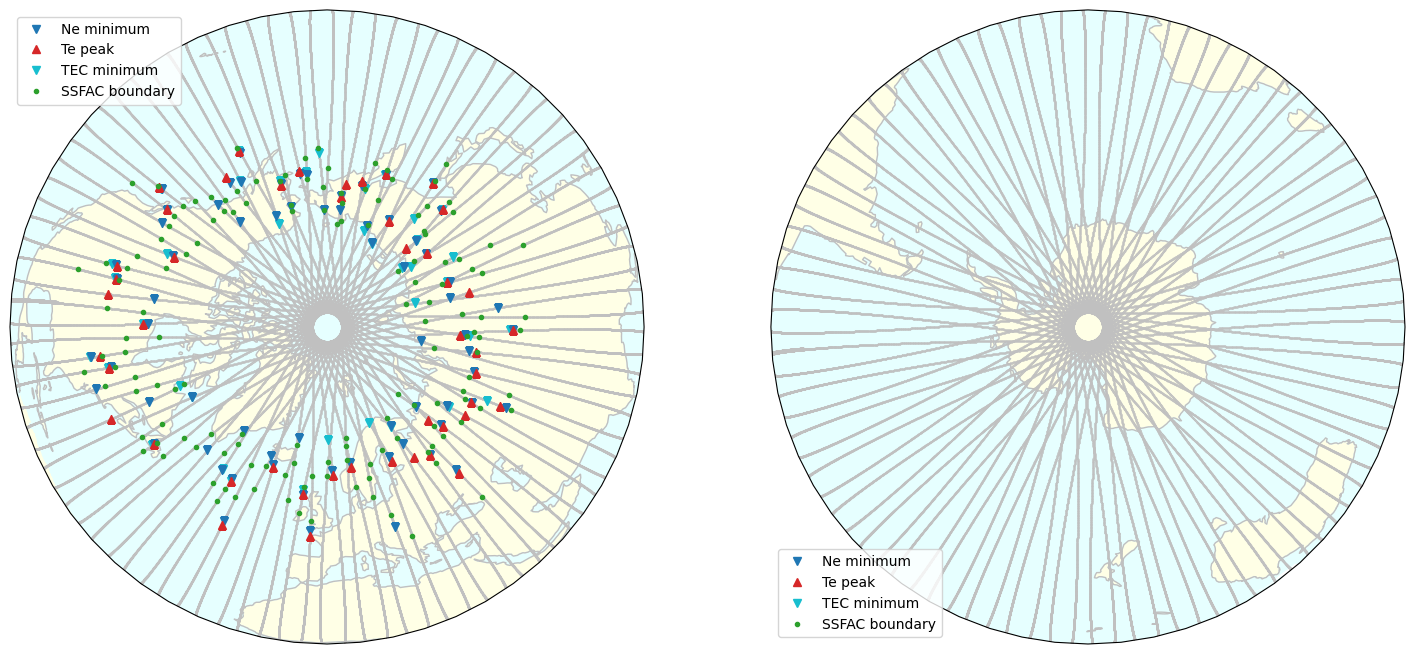

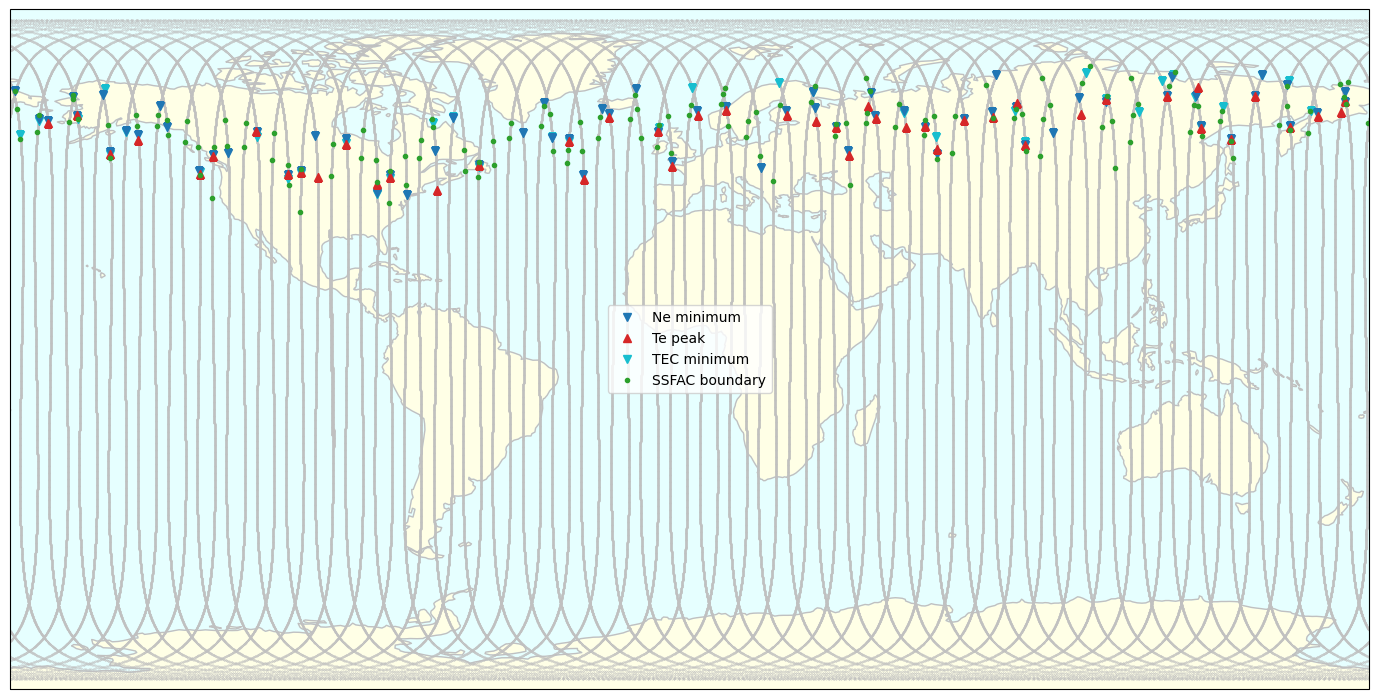

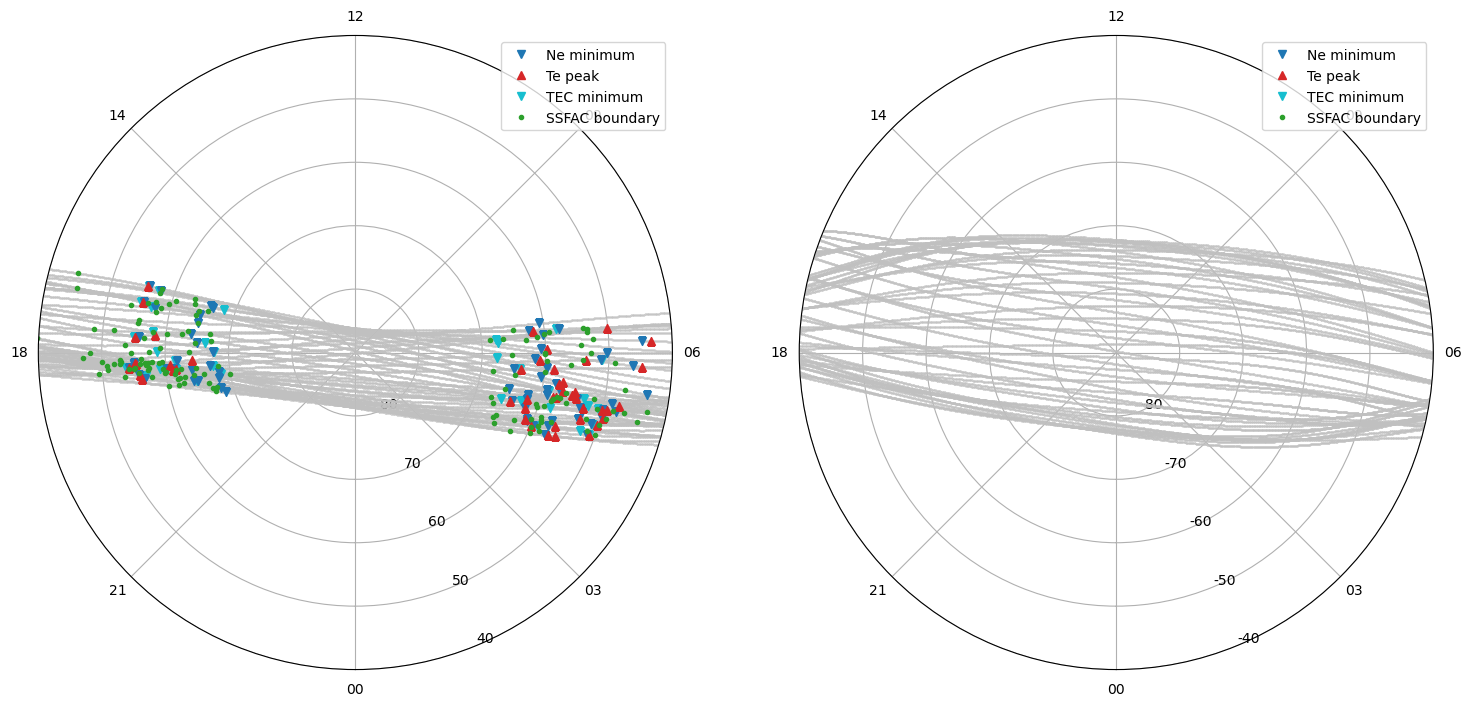

In [3]:
from numpy import isnan, logical_and, abs as aabs, cumsum, stack, pi, concatenate, timedelta64
from matplotlib.pyplot import figure, subplot, show
from scipy.interpolate import interp1d
from cartopy.feature import LAND, OCEAN, COASTLINE
from cartopy.crs import Mollweide, Orthographic, PlateCarree
%matplotlib inline

# orbit from MAGx_LR products


def _plot_maps(ax, north=None):
    gl = ax.gridlines(crs=PlateCarree(), draw_labels=False, linewidth=0, color='silver', alpha=0.5, linestyle='--')
    ax.add_feature(LAND, facecolor=(1.0, 1.0, 0.9))
    ax.add_feature(OCEAN, facecolor=(0.9, 1.0, 1.0))
    ax.add_feature(COASTLINE, edgecolor='silver')

    o_lat = data_track['Latitude'].values
    o_lon = data_track['Longitude'].values
    if north is not None:
        h = 1 if north else -1
        mask = o_lat*h > 0
    else:
        mask = Ellipsis
    h_track = ax.plot(o_lon[mask], o_lat[mask], '.', markersize=0.5, color='silver', transform=PlateCarree())
    
    h_tec_min, = ax.plot(data_tec_min['Longitude'].values, data_tec_min['Latitude'].values, 'v', color='tab:cyan', transform=PlateCarree())
    h_ne_min, = ax.plot(data_ne_min['Longitude'].values, data_ne_min['Latitude'].values, 'v', color='tab:blue', transform=PlateCarree())
    h_te_peak, = ax.plot(data_te_peak['Longitude'].values, data_te_peak['Latitude'].values, '^', color='tab:red', transform=PlateCarree())
    h_ssfac, = ax.plot(data_ssfac['Longitude'].values, data_ssfac['Latitude'].values, 'o', color='tab:green', ms=3, transform=PlateCarree())

    ax.legend(
    [
        h_ne_min,
        h_te_peak,
        h_tec_min,
        h_ssfac,
    ],
    [
        'Ne minimum',
        'Te peak',
        'TEC minimum',
        'SSFAC boundary'
    ],
)
    
def plot_maps_ortho(ax, north):   
    ax.set_xlim([-6378073.21863, 6378073.21863])
    ax.set_ylim([-6378073.21863, 6378073.21863])
    _plot_maps(ax, north)

def plot_maps(ax):
    _plot_maps(ax)

        
        
fig = figure(figsize=(18, 9), dpi=100)
plot_maps_ortho(subplot(1, 2, 1, projection=Orthographic(0, 90)), north=True)
plot_maps_ortho(subplot(1, 2, 2, projection=Orthographic(0, -90)), north=False)

fig = figure(figsize=(18, 9), dpi=100)
plot_maps(subplot(1, 1, 1, projection=PlateCarree()))


def plot_mlt(ax, north=True):
    ax.set_theta_zero_location('S')
    h = 1 if north else -1
    
    def _plot(x, y, *args, **kwargs):
        return ax.plot(x*(pi/12), 90 - y*h, *args, **kwargs)

    o_lat_qd = data_track['QDLat'].values
    o_mlt = data_track['MLT'].values
    if north is not None:
        h = 1 if north else -1
        mask = o_lat_qd*h > 0
    else:
        mask = Ellipsis
    h_track = _plot(o_mlt[mask], o_lat_qd[mask], '.', markersize=0.5, color='silver')
    
    h_tec_min, = _plot(data_tec_min['MLT'].values, data_tec_min['QDLat'].values, 'v', color='tab:cyan')
    h_ne_min, = _plot(data_ne_min['MLT'].values, data_ne_min['QDLat'].values, 'v', color='tab:blue')
    h_te_peak, = _plot(data_te_peak['MLT'].values, data_te_peak['QDLat'].values, '^', color='tab:red')
    h_ssfac, = _plot(data_ssfac['MLT'].values, data_ssfac['QDLat'].values, 'o', color='tab:green', ms=3)
    
    ax.set_ylim(0, 50)
    ax.set_xticklabels(['%2.2i' % (x*12/pi) for x in ax.get_xticks()])
    ax.set_yticklabels(['%.0f' % ((90 - y)*h) for y in ax.get_yticks()])
    #ax.plot(o_lon[o_lat*h > 0], o_lat[o_lat*h > 0], '-', color='silver', transform=PlateCarree())
    
    ax.legend(
    [
        h_ne_min,
        h_te_peak,
        h_tec_min,
        h_ssfac,
    ],
    [
        'Ne minimum',
        'Te peak',
        'TEC minimum',
        'SSFAC boundary'
    ],
)

fig = figure(figsize=(18, 9), dpi=100)
plot_mlt(subplot(1, 2, 1, projection='polar'), north=True)
plot_mlt(subplot(1, 2, 2, projection='polar'), north=False)